In [411]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [412]:
df = pd.read_csv('/content/train.csv')
df1 = pd.read_csv('/content/test.csv')

In [413]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [414]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,25,Yes,No,Fiber optic,Yes,no,yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.00,2787.00
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30.00,30.00
2,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
3,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
4,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [416]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            20 non-null     object 
 1   SeniorCitizen     20 non-null     int64  
 2   Partner           20 non-null     object 
 3   Dependents        20 non-null     object 
 4   tenure            20 non-null     int64  
 5   PhoneService      20 non-null     object 
 6   MultipleLines     20 non-null     object 
 7   InternetService   20 non-null     object 
 8   OnlineSecurity    20 non-null     object 
 9   OnlineBackup      20 non-null     object 
 10  DeviceProtection  20 non-null     object 
 11  TechSupport       20 non-null     object 
 12  StreamingTV       20 non-null     object 
 13  StreamingMovies   20 non-null     object 
 14  Contract          20 non-null     object 
 15  PaperlessBilling  20 non-null     object 
 16  PaymentMethod     20 non-null     object 
 17 

In [417]:
## checking the percentage of nan values present in each feature

features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

In [418]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [419]:
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [420]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [421]:
# Check the  Statistical Numerical Data Distribution Summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [422]:
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,20.0,20.000000,20.000000,20.000000
mean,0.0,21.400000,65.662500,1680.355000
std,0.0,19.701456,32.801412,1737.730413
min,0.0,1.000000,18.950000,29.850000
25%,0.0,2.000000,29.962500,140.775000
50%,0.0,19.000000,56.550000,1330.625000
75%,0.0,29.500000,101.187500,2787.000000
max,0.0,62.000000,106.000000,5681.100000


In [423]:
df.corr() # the correlation between the columns

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


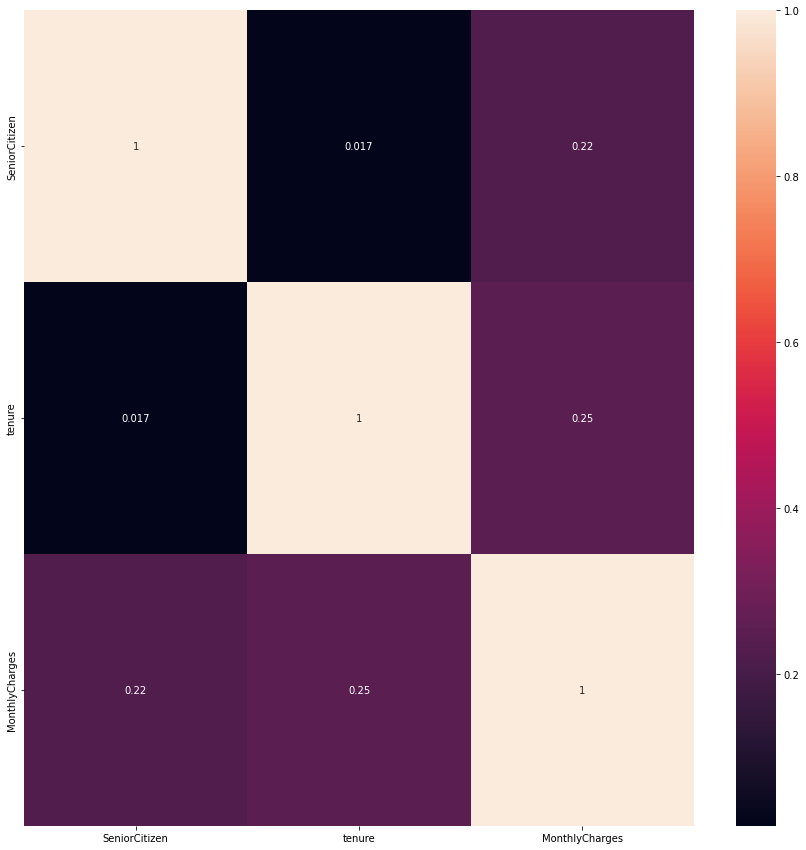

In [424]:
# Correlation of the columns shown in a heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True);

In [425]:
# Identifying the unique number of values in the dataset
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [426]:
df1.nunique()

gender               2
SeniorCitizen        1
Partner              2
Dependents           2
tenure              14
PhoneService         2
MultipleLines        3
InternetService      3
OnlineSecurity       3
OnlineBackup         4
DeviceProtection     4
TechSupport          3
StreamingTV          3
StreamingMovies      3
Contract             3
PaperlessBilling     2
PaymentMethod        4
MonthlyCharges      17
TotalCharges        17
dtype: int64

In [427]:
df=df.drop('customerID',axis=1)

In [428]:
# defining numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['SeniorCitizen', 'tenure', 'MonthlyCharges']

We have 17 categorical features : ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [429]:
# defining numerical & categorical columns
numeric_features = [feature for feature in df1.columns if df1[feature].dtype != 'O']
categorical_features = [feature for feature in df1.columns if df1[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

We have 15 categorical features : ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [430]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)

In [431]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

df['gender']= label_encoder.fit_transform(df['gender'])
df['Partner']= label_encoder.fit_transform(df['Partner'])

df['Dependents']= label_encoder.fit_transform(df['Dependents'])
df['PhoneService']= label_encoder.fit_transform(df['PhoneService'])

df['MultipleLines']= label_encoder.fit_transform(df['MultipleLines'])
df['InternetService']= label_encoder.fit_transform(df['InternetService'])
df['OnlineSecurity']= label_encoder.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']= label_encoder.fit_transform(df['OnlineBackup'])
df['DeviceProtection']= label_encoder.fit_transform(df['DeviceProtection'])
df['TechSupport']= label_encoder.fit_transform(df['TechSupport'])

df['StreamingTV']= label_encoder.fit_transform(df['StreamingTV'])
df['StreamingMovies']= label_encoder.fit_transform(df['StreamingMovies'])
df['Contract']= label_encoder.fit_transform(df['Contract'])
df['PaperlessBilling']= label_encoder.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']= label_encoder.fit_transform(df['PaymentMethod'])
df['TotalCharges']= label_encoder.fit_transform(df['TotalCharges'])


In [432]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

df1['gender']= label_encoder.fit_transform(df1['gender'])
df1['Partner']= label_encoder.fit_transform(df1['Partner'])

df1['Dependents']= label_encoder.fit_transform(df1['Dependents'])
df1['PhoneService']= label_encoder.fit_transform(df1['PhoneService'])

df1['MultipleLines']= label_encoder.fit_transform(df1['MultipleLines'])
df1['InternetService']= label_encoder.fit_transform(df1['InternetService'])
df1['OnlineSecurity']= label_encoder.fit_transform(df1['OnlineSecurity'])
df1['OnlineBackup']= label_encoder.fit_transform(df1['OnlineBackup'])
df1['DeviceProtection']= label_encoder.fit_transform(df1['DeviceProtection'])
df1['TechSupport']= label_encoder.fit_transform(df1['TechSupport'])

df1['StreamingTV']= label_encoder.fit_transform(df1['StreamingTV'])
df1['StreamingMovies']= label_encoder.fit_transform(df1['StreamingMovies'])
df1['Contract']= label_encoder.fit_transform(df1['Contract'])
df1['PaperlessBilling']= label_encoder.fit_transform(df1['PaperlessBilling'])
df1['PaymentMethod']= label_encoder.fit_transform(df1['PaymentMethod'])
df1['TotalCharges']= label_encoder.fit_transform(df1['TotalCharges'])


In [433]:
# Identify the columns with potential outliers
outlier_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges','TotalCharges']

# Replace outliers with the upper and lower bounds
for col in outlier_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

In [434]:
# Identify the columns with potential outliers
outlier_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges','TotalCharges']

# Replace outliers with the upper and lower bounds
for col in outlier_cols:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    df1[col] = np.where(df1[col] > upper_bound, upper_bound, df1[col])
    df1[col] = np.where(df1[col] < lower_bound, lower_bound, df1[col])

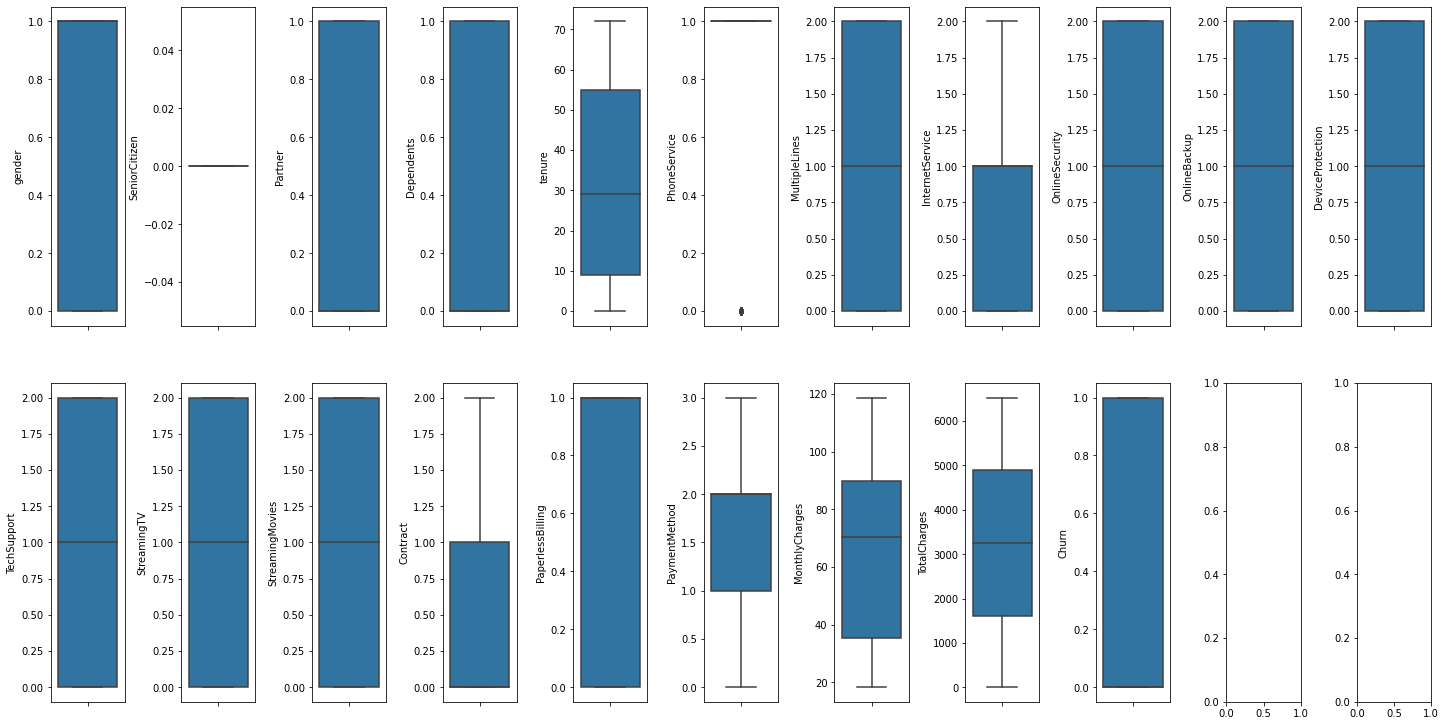

In [435]:
#checking outiliers in dataset
fig, axs = plt.subplots(ncols=11, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data= df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [436]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [437]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [438]:
feature_names = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']
x = pd.DataFrame(data=x, columns=feature_names)

In [439]:

x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0.0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505.0
1,1,0.0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466.0
2,1,0.0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157.0
3,1,0.0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400.0
4,0,0.0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0.0,1,1,24.0,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597.0
7039,0,0.0,1,1,72.0,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698.0
7040,0,0.0,1,1,11.0,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994.0
7041,1,0.0,1,0,4.0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660.0


In [440]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [441]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [442]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [443]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [444]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [445]:
model_dt.score(x_test,y_test)

0.7892122072391767

In [446]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1043
           1       0.67      0.37      0.48       366

    accuracy                           0.79      1409
   macro avg       0.74      0.65      0.67      1409
weighted avg       0.77      0.79      0.77      1409



In [447]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)


In [448]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [449]:
y_pred=model_rf.predict(x_test)

In [450]:
model_rf.score(x_test,y_test)

0.8076650106458482

In [451]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1043
           1       0.71      0.43      0.54       366

    accuracy                           0.81      1409
   macro avg       0.77      0.69      0.71      1409
weighted avg       0.80      0.81      0.79      1409



In [452]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("model_rf.pkl","wb")
pickle.dump(model_rf, pickle_out)
pickle_out.close()

In [453]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505.0,0
1,1,0.0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466.0,0
2,1,0.0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157.0,1
3,1,0.0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400.0,0
4,0,0.0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925.0,1


In [454]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0.0,0,0,25.0,1,0,1,2,3,3,2,2,2,0,1,2,106.00,12.0
1,0,0.0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,30.00,1.0
2,0,0.0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0.0
3,0,0.0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0.0
4,0,0.0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0.0


In [455]:
model_rf.predict([[0,0.0,1,0,1.0,0,0,0,0,2,0,0,0,0,0,1,2,29.85,2505.0]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [456]:
prediction = model_rf.predict(df1)


In [457]:
first_prediction = prediction[0]


In [458]:
probabilities = model_rf.predict_proba(df1)
first_probabilities = probabilities[0]


In [459]:
churn = y_pred >= 0.5

In [460]:
churn

array([False, False, False, ...,  True, False, False])

In [461]:
y_pred = model_rf.predict_proba([[1,0.0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466.0]])[0, 1]
churn = y_pred >= 0.5
output_prob = float(y_pred)
output = bool(churn)
           

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [462]:
output_prob

0.05789440205606529

In [463]:
output

False

In [464]:
x_train=df.drop('Churn',axis=1)
y_train=df['Churn']

In [465]:
x_test,y_test=df1()

TypeError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)


In [ ]:
model_rf.fit(x_train,y_train)

In [ ]:
y_pred=model_rf.predict(x_test)

In [ ]:
model_rf.score(x_test,y_test)